In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [40]:
df = pd.read_csv('../datasets/Heart.csv', index_col=0)

In [41]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


C:\Users\praji\AppData\Local\Temp\ipykernel_18332\4022990980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='AHD', palette='Set1')


<Axes: xlabel='AHD', ylabel='count'>

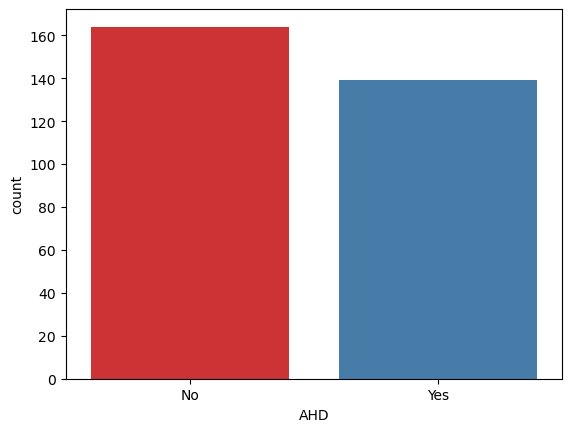

In [42]:
sns.countplot(df, x='AHD', palette='Set1')

In [44]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [45]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal'], drop_first=True)

In [46]:
df.head()

,Age,RestBP,Chol,MaxHR,Oldpeak,Ca,AHD,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Fbs_1,RestECG_1,RestECG_2,ExAng_1,Slope_2,Slope_3,Thal_normal,Thal_reversable
1,63,145,233,150,2.3,0.0,No,True,False,False,True,True,False,True,False,False,True,False,False
2,67,160,286,108,1.5,3.0,Yes,True,False,False,False,False,False,True,True,True,False,True,False
3,67,120,229,129,2.6,2.0,Yes,True,False,False,False,False,False,True,True,True,False,False,True
4,37,130,250,187,3.5,0.0,No,True,True,False,False,False,False,False,False,False,True,True,False
5,41,130,204,172,1.4,0.0,No,False,False,True,False,False,False,True,False,False,False,True,False


In [47]:
X, y = df.drop(columns='AHD'), df['AHD']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [49]:
base_clf = DecisionTreeClassifier()

In [56]:
param_grid = {
    'ccp_alpha': np.logspace(-4, 0, num=100) # modified from the first time
}

In [57]:
grid_model = GridSearchCV(base_clf, param_grid, verbose=3)

In [58]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................ccp_alpha=0.0001;, score=0.791 total time=   0.0s
[CV 2/5] END ..................ccp_alpha=0.0001;, score=0.767 total time=   0.0s
[CV 3/5] END ..................ccp_alpha=0.0001;, score=0.667 total time=   0.0s
[CV 4/5] END ..................ccp_alpha=0.0001;, score=0.690 total time=   0.0s
[CV 5/5] END ..................ccp_alpha=0.0001;, score=0.762 total time=   0.0s
[CV 1/5] END ..ccp_alpha=0.00010974987654930556;, score=0.744 total time=   0.0s
[CV 2/5] END ..ccp_alpha=0.00010974987654930556;, score=0.767 total time=   0.0s
[CV 3/5] END ..ccp_alpha=0.00010974987654930556;, score=0.667 total time=   0.0s
[CV 4/5] END ..ccp_alpha=0.00010974987654930556;, score=0.690 total time=   0.0s
[CV 5/5] END ..ccp_alpha=0.00010974987654930556;, score=0.762 total time=   0.0s
[CV 1/5] END ..ccp_alpha=0.00012045035402587823;, score=0.721 total time=   0.0s
[CV 2/5] END ..ccp_alpha=0.0001204503540258782

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00])},
             verbose=3)

In [59]:
grid_model.best_params_

{'ccp_alpha': 0.016681005372000592}

In [60]:
y_pred = grid_model.predict(X_test)

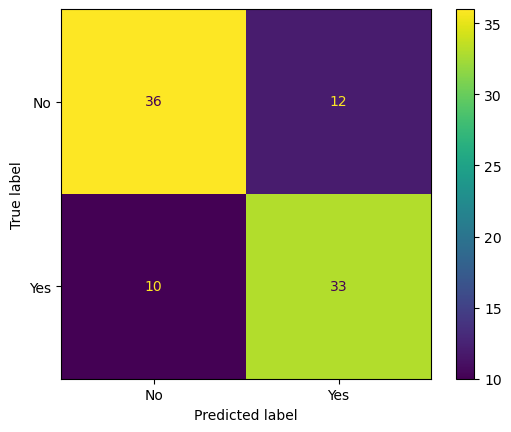

In [61]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.78      0.75      0.77        48
         Yes       0.73      0.77      0.75        43

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [76]:
# Not too shabby!

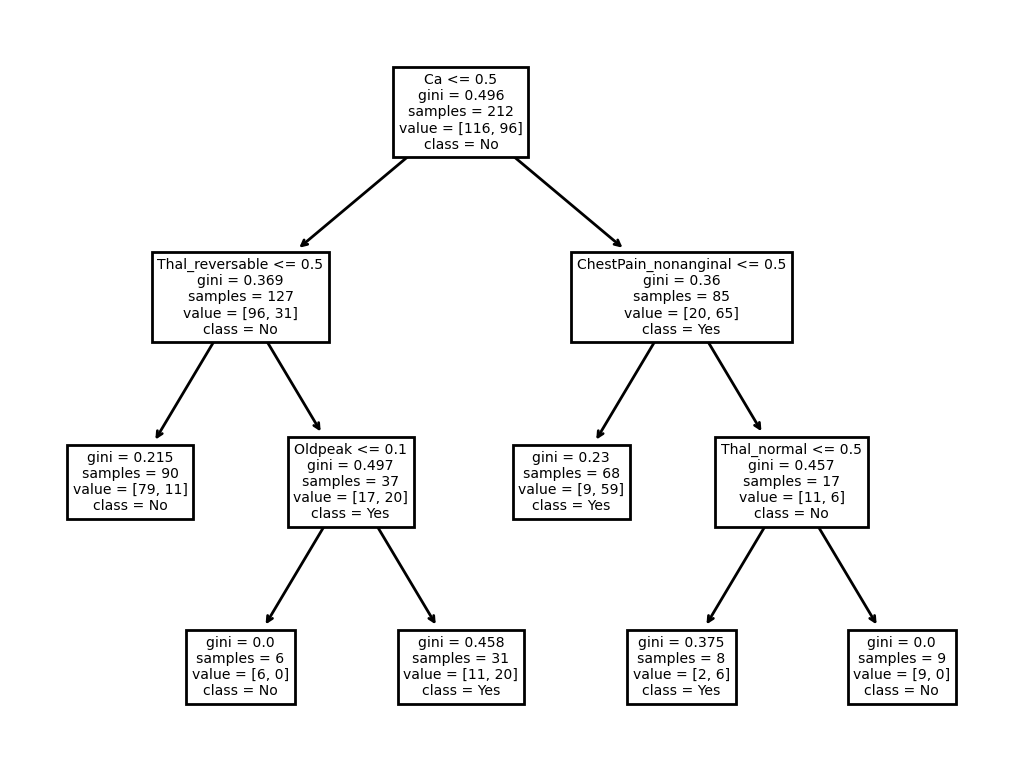

In [79]:
# The final tree
plt.figure(dpi=200)
plot_tree(grid_model.best_estimator_, feature_names=grid_model.feature_names_in_, class_names=grid_model.classes_)
plt.show()

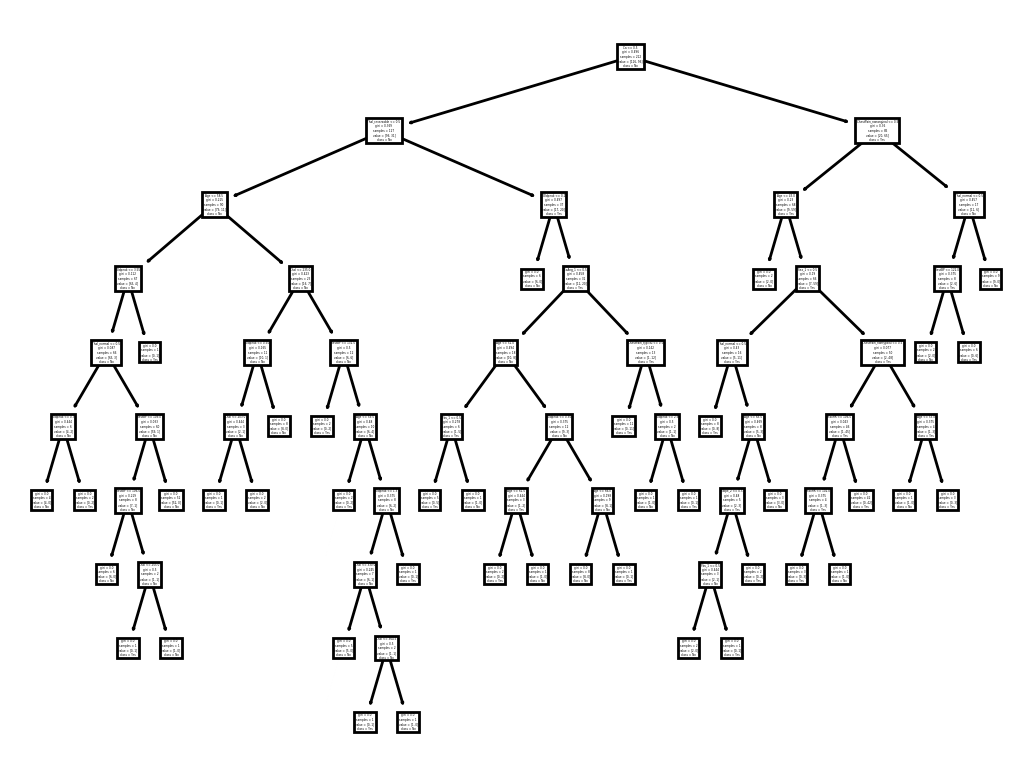

In [78]:
# The overfitted tree
base_clf.fit(X_train, y_train)
plt.figure(dpi=200)
plot_tree(base_clf, feature_names=base_clf.feature_names_in_, class_names=base_clf.classes_)
plt.show()